### Data Processing on Proportion of infographics in videos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import *
import json
from IPython.display import display
import re

In [2]:
df = pd.read_excel('FinalCSV.xlsx') #read xlsx file and save as df
df.to_csv('videoData.csv', index=False) #convert df to csv and save it, set index to false to prevent saving row index as additional column
df = pd.read_csv('videoData.csv') # read csv as df

In [3]:
df # display entire dataframe

,Channel,video id,|__videoKind,|__publishedAt,|__videoTitle,|__playlistId,|__categoryId,|__duration,|__viewCount,|__likeCount,|__disLikeCount,score,participant id,# of votes,mean,std
0,UC64UiPJwM_e9AqAd7RiD7JA | Today I Found Out,--6T95cQa50,youtube#video,2018-09-27T18:06:19.000Z,How Did Rickrolling Start? (And Did Rick Astle...,UU64UiPJwM_e9AqAd7RiD7JA,27.0,PT10M41S,289863.0,9381.0,183.0,"0, 0","['A86CAG3LG83GG', 'A36SUOEMOIXFSO']",2,0.000000,0.000000
1,UC64UiPJwM_e9AqAd7RiD7JA | Today I Found Out,--tloYRgAmQ,youtube#video,2018-05-27T17:00:01.000Z,The Angel of Death,UU64UiPJwM_e9AqAd7RiD7JA,27.0,PT9M8S,423743.0,10320.0,354.0,"0, 0","['AA4KKLIU4C3NY', 'AYMJAMX7Z7YHG']",2,0.000000,0.000000
2,UCfdNM3NAhaBOXCafH7krzrA | The Infographics Show,-0ItKiW7AQc,youtube#video,2018-05-04T14:00:01.000Z,Will This Superbug Destroy Us All?,UUfdNM3NAhaBOXCafH7krzrA,27.0,PT7M44S,152102.0,3824.0,99.0,"0, 0","['A2Z0V2A4SP5QE0', 'A2CS92S5XOYS3B']",2,0.000000,0.000000
3,UCfdNM3NAhaBOXCafH7krzrA | The Infographics Show,-169Ut9JSJk,youtube#video,2019-03-22T01:15:00.000Z,"Why You Don't Want To Make More Than $75,000",UUfdNM3NAhaBOXCafH7krzrA,27.0,PT10M21S,317573.0,6891.0,490.0,"0, 1","['A1SNX9NBRRIVON', 'A3NNWJI1G86RJ2']",2,0.500000,0.500000
4,UCfdNM3NAhaBOXCafH7krzrA | The Infographics Show,-1IbLTa5XLo,youtube#video,2019-04-22T20:15:00.000Z,The United States (USA) vs Asia - Who Would Wi...,UUfdNM3NAhaBOXCafH7krzrA,27.0,PT11M36S,287178.0,6219.0,2008.0,"0, 0, 0","['A16QZSBYXE5VY8', 'AIUKV0KVALMY6', 'A3MIMTJL7...",3,0.000000,0.000000
5,UCZYTClx2T1of7BRZ86-8fow | SciShow,-1P0HKfTrfY,youtube#video,2018-06-07T21:00:00.000Z,"What Growing Mini Brains Has Taught Us, And Wh...",UUZYTClx2T1of7BRZ86-8fow,27.0,PT5M4S,151853.0,5898.0,295.0,0,['A2XPWASDT8AYXH'],1,0.000000,0.000000
6,UCRyIP2oznv4UPAl1jmKS5kA | Top 10s,-1PF_1aaUmg,youtube#video,2016-07-09T14:03:09.000Z,10 Kids Who EMBARRASSED Their Parents,UURyIP2oznv4UPAl1jmKS5kA,24.0,PT4M22S,1474095.0,5927.0,538.0,"1, 2","['AXHC7OMH8XE9U', 'A16QZSBYXE5VY8']",2,1.500000,0.500000
7,UCkJEpR7JmS36tajD34Gp4VA | Psych2Go,-1n83OAgPp4,youtube#video,2016-11-13T20:13:37.000Z,7 Surprising Ways Birth Order Affects Us,UUkJEpR7JmS36tajD34Gp4VA,27.0,PT4M4S,380604.0,9239.0,681.0,0,['A24RQYIDMV7OPK'],1,0.000000,0.000000
8,UCLXo7UDZvByw2ixzpQCufnA | Vox,-1y8Nq0ndsk,youtube#video,2019-02-06T13:00:00.000Z,"A murder solved, 23 years later | Part 3",UULXo7UDZvByw2ixzpQCufnA,25.0,PT13M3S,603381.0,23869.0,271.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","['A20NITCOBY4775', 'A17FDM5CXENC1O', 'A27U34JQ...",84,0.662791,0.756529
9,UCLXo7UDZvByw2ixzpQCufnA | Vox,-1y8Nq0ndsk,youtube#video,2019-02-06T13:00:00.000Z,"A murder solved, 23 years later | Part 3",UULXo7UDZvByw2ixzpQCufnA,25.0,PT13M3S,603381.0,23869.0,271.0,"0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","['A20NITCOBY4775', 'A17FDM5CXENC1O', 'A27U34JQ...",84,0.662791,0.756529


In [4]:
dfFirstRow = list(df.iloc[0])# first row of data frame 
colName = list(df.columns.values) # column name values

regex = re.compile('[^a-zA-Z]') # use regex to only extract alphabetic characters
firstCharToLower = lambda test_str: test_str[:1].lower() + test_str[1:] if test_str else '' #create lambda function to convert first char to lowercase

for i, word in enumerate(colName): #for each word in of the ith index in the list colName
        word = regex.sub('', colName[i]) # remove all non-alphabetic char
        word = firstCharToLower(word) #convert first char to lowercase
        colName[i] = word #replace colName

# more pre-processing to clean up colName
for i, word in enumerate(colName):
    if "publishedAt" in colName[i]:
            colName[i]= 'publishedDateTime'
    if "videoid" in colName[i]:
            colName[i]= 'videoId'
    if "disLikeCount" in colName[i]:
            colName[i]= 'dislikeCount'
    if "ofvotes" in colName[i]:
            colName[i]= 'numOfVotes'
    if "participantid" in colName[i]:
            colName[i]= 'participantId'

df.columns = (colName)# rename colName

In [5]:
df.shape #10573 videos with 16 columns

(10573, 16)

In [6]:
#df[df['mean'] == 0]['mean'].shape  #also returns num of videos with mean score of 0
df[df['mean'] ==0]['mean'].count() 

4121

In [7]:
df[df.duplicated(['videoId'])]['videoId'].count() #number of videos with duplicates: 790
df[df.duplicated(['videoTitle'], keep = False)][['videoTitle', 'videoId']] # videoTitle and videoId of all duplicates based on videoTitle

,videoTitle,videoId
8,"A murder solved, 23 years later | Part 3",-1y8Nq0ndsk
9,"A murder solved, 23 years later | Part 3",-1y8Nq0ndsk
11,Why this creepy melody is in so many movies,-3-bVRYRnSM
12,Why this creepy melody is in so many movies,-3-bVRYRnSM
14,Why Atlantic fish are invading the Arctic,-3h4Xt9No9o
15,Why Atlantic fish are invading the Arctic,-3h4Xt9No9o
31,"Michael Cohen: Sex, lies, and campaign finance",-CLttw5dl5w
32,"Michael Cohen: Sex, lies, and campaign finance",-CLttw5dl5w
64,Minecraft isn't just a game. It's an art form.,-Of_yz-4iXs
65,Minecraft isn't just a game. It's an art form.,-Of_yz-4iXs


In [8]:
# dropping ALL video duplicates based on videoId by keeping first one
df.drop_duplicates(subset ="videoId", keep = "first").count()
df= df.drop_duplicates(subset ="videoId", keep = "first") #set df variable to the new df with dropped duplicates
df.to_csv('preprocessedVideoData.csv') #save as new csv file

In [9]:
meanFreqDict = df['mean'].value_counts().to_dict() # convert the mean scores and their freqs to dict as key-val pairs
sortedMeanFreqByMean = {} #create empty dict to save sorted dict by mean scores in ascending order
for key in sorted(meanFreqDict): #for each key in the meanFreqDict dictionary, extract the key
    sortedMeanFreqByMean[key]=  meanFreqDict[key] #set the key-value pairs
    
#sortedMeanFreqByMean # dictionary sorted by Mean Score as keys

In [10]:
len(sortedMeanFreqByMean) #63 mean scores as keys -- there are 63 unique mean scores

63

In [11]:
lists = sorted(sortedMeanFreqByMean.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples


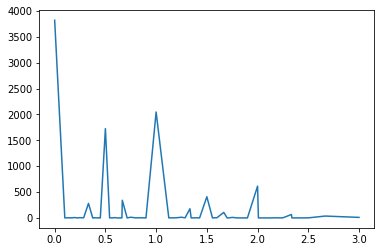

In [12]:
plt.plot(x, y) # plot mean scores as x axis, frequency of score as y axis
plt.show()

In [13]:
meanScoreDF = pd.DataFrame(lists)
# meanScoreDF 

#### Normalize the Mean Score from Scale of 0-3 to 0-1.

In [14]:
normalizedMeanScore=(meanScoreDF[meanScoreDF.columns[0]]-meanScoreDF[meanScoreDF.columns[0]].min())/(meanScoreDF[meanScoreDF.columns[0]].max()-meanScoreDF[meanScoreDF.columns[0]].min())
#normalizedMeanScore

In [15]:
normalizedMeanScoreDF  = pd.DataFrame(lists)
# normalizedMeanScoreDF.columns[0]
normalizedMeanScoreDF[0] = normalizedMeanScore
#normalizedMeanScoreDF

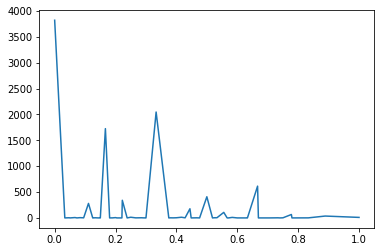

In [16]:
plt.plot(normalizedMeanScoreDF[0], normalizedMeanScoreDF[1])

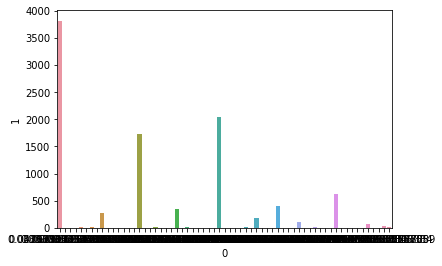

In [17]:
# create barplot for visualizing frequency of scores
ax = sns.barplot(normalizedMeanScoreDF[0], normalizedMeanScoreDF[1], data=normalizedMeanScoreDF)


#### Criteria for Filtering Animation Template Videos
- mean score == 0 for now
- more than 1 votes 
- good animation style - (note: films may not be appropriate,videos from "the infograhics show" has very different style of animation)
- less talking-head style

- HX Note: I defined 'good animation style' as 'likeCount'> 2000

- This leaves us with 2092 videos

In [20]:
dfNoShow = df[~df["channel"].str.contains('The Infographics Show')]# only videos NOT from The Infographics Show channel
# Subset df based on criteria above
dfNoShow[(dfNoShow['numOfVotes']>1)& (dfNoShow['likeCount']>=2000)& (dfNoShow['mean'] == 0)].count()

channel              2092
videoId              2092
videoKind            2092
publishedDateTime    2092
videoTitle           2092
playlistId           2092
categoryId           2092
duration             2092
viewCount            2092
likeCount            2092
dislikeCount         2092
score                2092
participantId        2092
numOfVotes           2092
mean                 2092
std                  2092
dtype: int64

1346903.4189430992